In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estadísti-a-descriptiva-a-redes-neuronales/statistics':
  os.chdir(r'/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estadísti-a-descriptiva-a-redes-neuronales/statistics')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1712727227.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1712727227.0, "/usr/lib/python3.12/zipimport.py": 1712727227.0, "/usr/lib/python3.12/codecs.py": 1712727227.0, "/usr/lib/python3.12/encodings/aliases.py": 1712727227.0, "/usr/lib/python3.12/encodings/__init__.py": 1712727227.0, "/usr/lib/python3.12/encodings/utf_8.py": 1712727227.0, "/usr/lib/python3.12/abc.py": 1712727227.0, "/usr/lib/python3.12/io.py": 1712727227.0, "/usr/lib/python3.12/stat.py": 1712727227.0, "/usr/lib/python3.12/_collections_abc.py": 1712727227.0, "/usr/lib/python3.12/genericpath.py": 1712727227.0, "/usr/lib/python3.12/posixpath.py": 1712727227.0, "/usr/lib/python3.12/os.py": 1712727227.0, "/usr/lib/python3.12/_sitebuiltins.py": 1712727227.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/site.py": 1712727227.0, "/usr/lib/python3.12/warnings.py": 1712727227.0, "/usr/lib/python3.12/importlib/__init__.py": 1712727227.0, "/u

/tmp/ipykernel_57492/3995645186.py:24: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
altura = np.array([150, 160, 170, 180, 190])
peso = np.array([50, 60, 70, 80, 90])

# Calcular medias
altura_media = np.mean(altura)
peso_media = np.mean(peso)

# Calcular beta_1
beta_1 = np.sum((altura - altura_media) * (peso - peso_media)) / np.sum((altura - altura_media) ** 2)

# Calcular beta_0
beta_0 = peso_media - beta_1 * altura_media

# Imprimir coeficientes
print(f'beta_0: {beta_0}')
print(f'beta_1: {beta_1}')

beta_0: -100.0
beta_1: 1.0


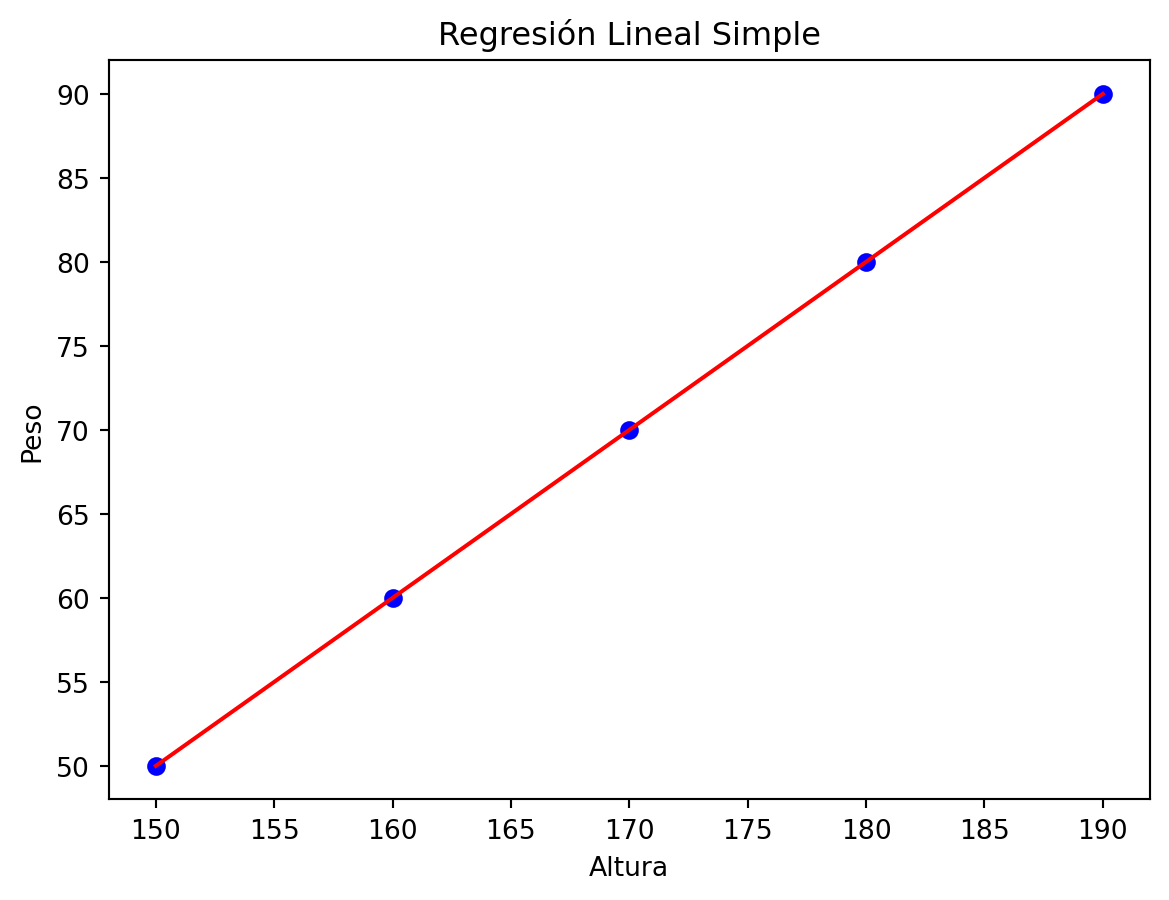

In [3]:
# Graficar datos
plt.scatter(altura, peso, color='blue')
plt.plot(altura, beta_0 + beta_1 * altura, color='red')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Regresión Lineal Simple')
plt.show()

beta_0: 40.626398573820204
beta_1: 0.10734921677319048


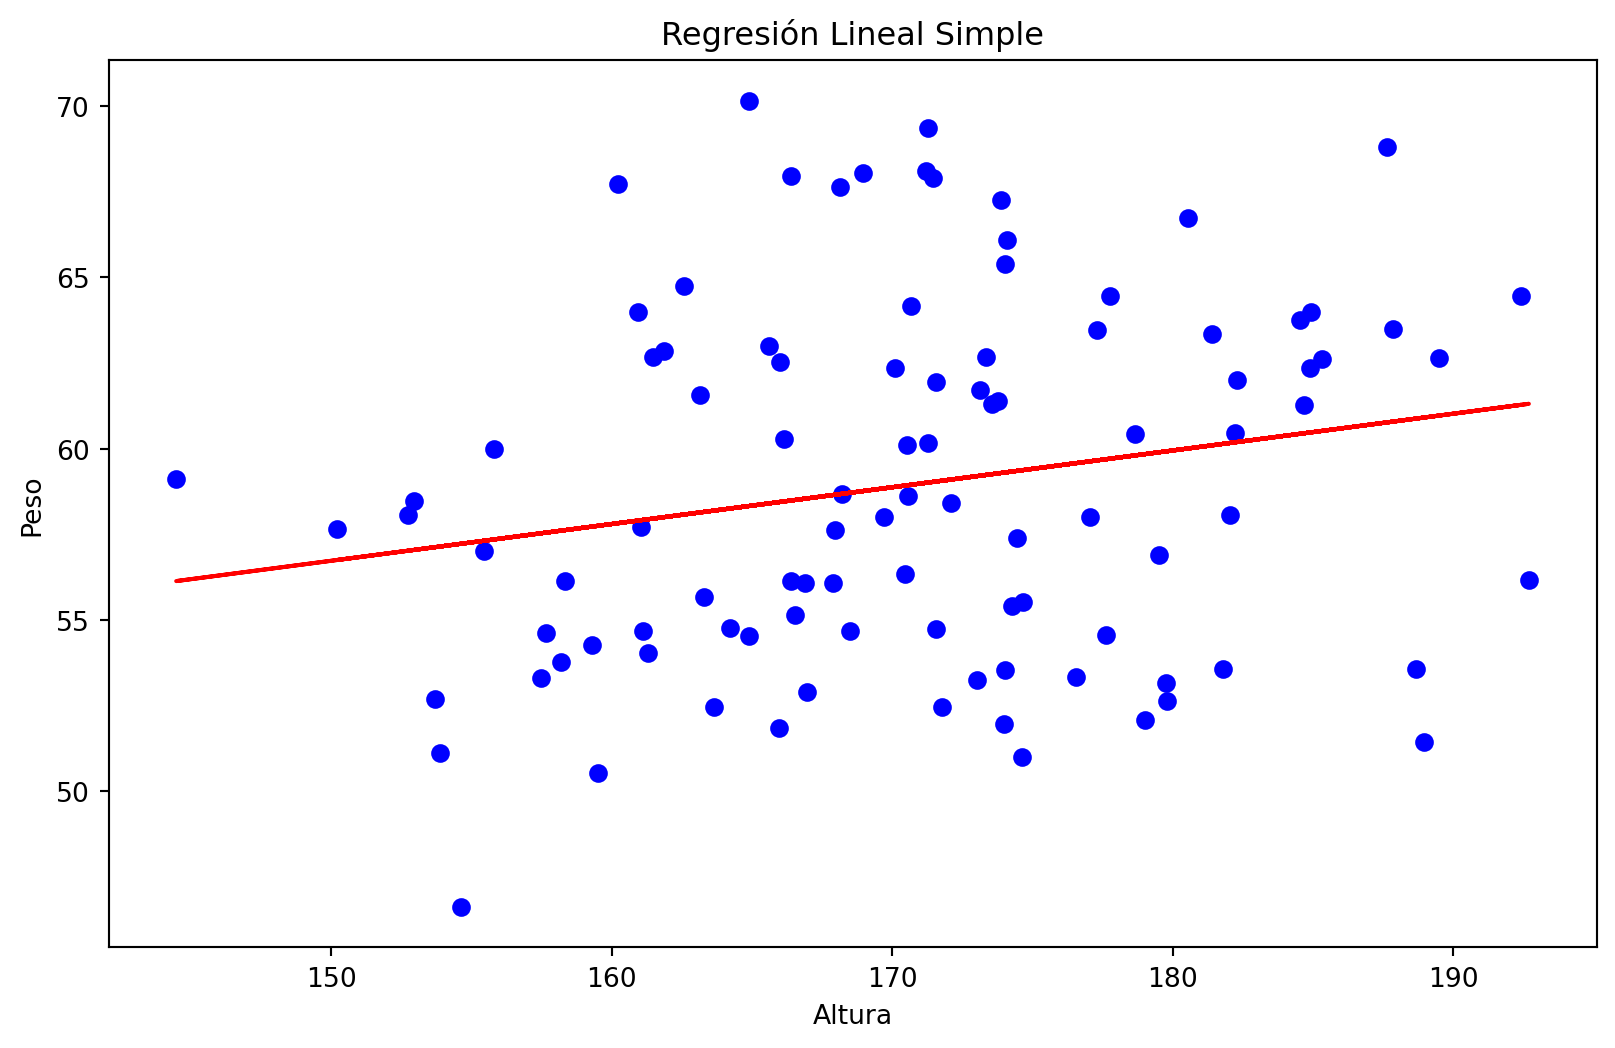

In [4]:
# Crear datos
np.random.seed(0)

altura = np.random.normal(170, 10, 100)
peso = 50 + 0.05 * altura + np.random.normal(0, 5, 100)

# Calcular medias
altura_media = np.mean(altura)
peso_media = np.mean(peso)

# Calcular beta_1
beta_1 = np.sum((altura - altura_media) * (peso - peso_media)) / np.sum((altura - altura_media) ** 2)

# Calcular beta_0
beta_0 = peso_media - beta_1 * altura_media

# Imprimir coeficientes
print(f'beta_0: {beta_0}')
print(f'beta_1: {beta_1}')

# Graficar datos
plt.figure(figsize=(10, 6))
plt.scatter(altura, peso, color='blue')
plt.plot(altura, beta_0 + beta_1 * altura, color='red')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Regresión Lineal Simple')
plt.show()

<Figure size 960x576 with 0 Axes>

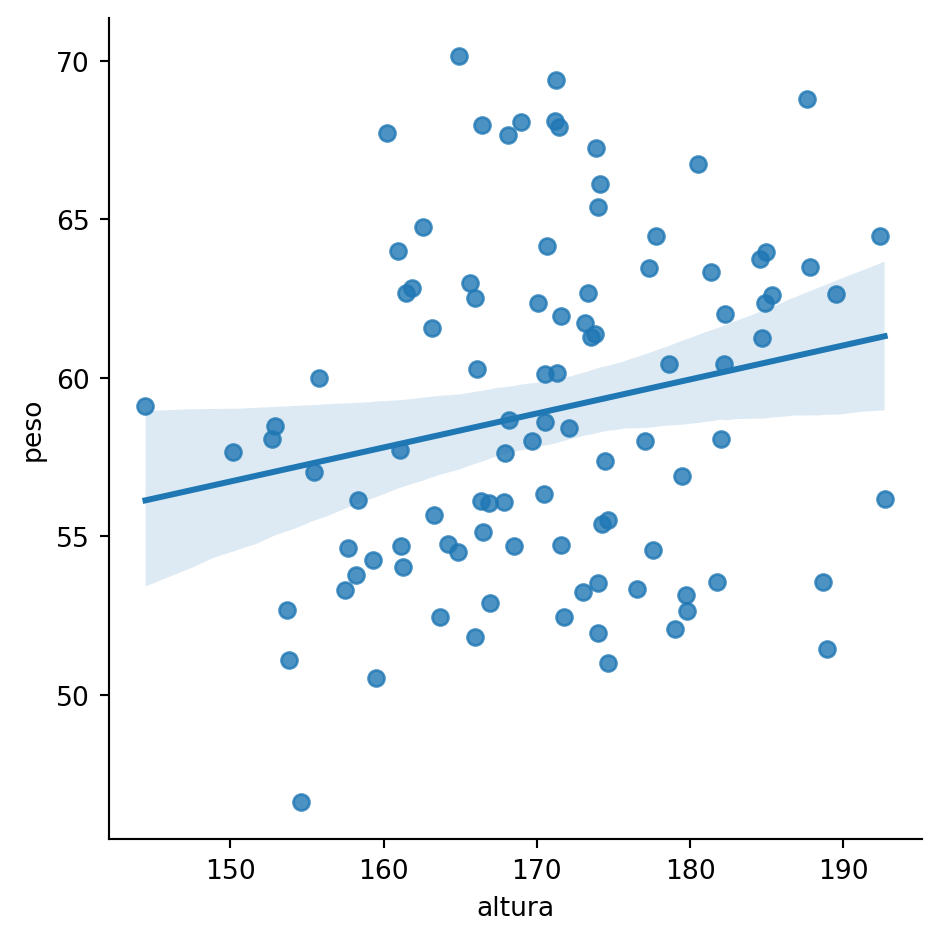

In [5]:
import seaborn as sns
import pandas as pd

# Crear DataFrame
df = pd.DataFrame({'altura': altura, 'peso': peso})

# Ajustar modelo
plt.figure(figsize=(10, 6))
sns.lmplot(x='altura', y='peso', data=df)

plt.show()

In [6]:
import statsmodels.api as sm

# Ajustar modelo
X = sm.add_constant(altura)
model = sm.OLS(peso, X).fit()

# Imprimir resumen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.341
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0398
Time:                        19:23:21   Log-Likelihood:                -305.62
No. Observations:                 100   AIC:                             615.2
Df Residuals:                      98   BIC:                             620.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6264      8.805      4.614      0.0

In [7]:
X

array([[  1.        , 187.64052346],
       [  1.        , 174.00157208],
       [  1.        , 179.78737984],
       [  1.        , 192.40893199],
       [  1.        , 188.6755799 ],
       [  1.        , 160.2272212 ],
       [  1.        , 179.50088418],
       [  1.        , 168.48642792],
       [  1.        , 168.96781148],
       [  1.        , 174.10598502],
       [  1.        , 171.44043571],
       [  1.        , 184.54273507],
       [  1.        , 177.61037725],
       [  1.        , 171.21675016],
       [  1.        , 174.43863233],
       [  1.        , 173.33674327],
       [  1.        , 184.94079073],
       [  1.        , 167.94841736],
       [  1.        , 173.13067702],
       [  1.        , 161.45904261],
       [  1.        , 144.47010184],
       [  1.        , 176.53618595],
       [  1.        , 178.64436199],
       [  1.        , 162.5783498 ],
       [  1.        , 192.69754624],
       [  1.        , 155.45634325],
       [  1.        , 170.45758517],
 

In [8]:
# Ajustar modelo
X = np.column_stack((np.ones(len(altura)), altura))

print(X)

beta = np.linalg.inv(X.T @ X) @ X.T @ peso

# Imprimir coeficientes
print(f'beta_0: {beta[0]}')
print(f'beta_1: {beta[1]}')

[[  1.         187.64052346]
 [  1.         174.00157208]
 [  1.         179.78737984]
 [  1.         192.40893199]
 [  1.         188.6755799 ]
 [  1.         160.2272212 ]
 [  1.         179.50088418]
 [  1.         168.48642792]
 [  1.         168.96781148]
 [  1.         174.10598502]
 [  1.         171.44043571]
 [  1.         184.54273507]
 [  1.         177.61037725]
 [  1.         171.21675016]
 [  1.         174.43863233]
 [  1.         173.33674327]
 [  1.         184.94079073]
 [  1.         167.94841736]
 [  1.         173.13067702]
 [  1.         161.45904261]
 [  1.         144.47010184]
 [  1.         176.53618595]
 [  1.         178.64436199]
 [  1.         162.5783498 ]
 [  1.         192.69754624]
 [  1.         155.45634325]
 [  1.         170.45758517]
 [  1.         168.1281615 ]
 [  1.         185.32779214]
 [  1.         184.6935877 ]
 [  1.         171.54947426]
 [  1.         173.7816252 ]
 [  1.         161.12214252]
 [  1.         150.19203532]
 [  1.        

In [9]:
# Normalización de los datos
X = (altura - np.mean(altura)) / np.std(altura)
Y = (peso - np.mean(peso)) / np.std(peso)
n = len(X)

# Valores iniciales de los parámetros
b0 = 0
b1 = 0

# Hiperparámetros
alpha = 1e-3
epochs = 10000

# Descenso del gradiente
for i in range(epochs):
    y_pred = b0 + b1 * X # Predicción

    db0 = (-2/n) * sum(Y - y_pred) # Derivada parcial de b0
    db1 = (-2/n) * sum(X * (Y - y_pred)) # Derivada parcial de b1

    b0 = b0 - alpha * db0 # Actualizar b0
    b1 = b1 - alpha * db1 # Actualizar b1

    if i % 500 == 0: # Imprimir resultados cada 500 iteraciones
        print(f"Epoch {i}: b0 = {b0 * np.std(peso) + np.mean(peso) - b1 * np.mean(altura)}, b1 = {b1 * (np.std(peso) / np.std(altura))}")

# Desnormalizar los parámetros
b1 = b1 * (np.std(peso) / np.std(altura))
b0 = b0 * np.std(peso) + np.mean(peso) - b1 * np.mean(altura)

# Imprimir coeficientes
print(f"Los valores óptimos son: b0 = {b0}, b1 = {b1}")

Epoch 0: b0 = 58.86970065046024, b1 = 0.00021469843354638102
Epoch 500: b0 = 36.69221818906457, b1 = 0.06797607549967058
Epoch 1000: b0 = 28.541743780104426, b1 = 0.09287914421609095
Epoch 1500: b0 = 25.546352702386315, b1 = 0.10203130224985668
Epoch 2000: b0 = 24.44551276862618, b1 = 0.10539482333349699
Epoch 2500: b0 = 24.040941703173104, b1 = 0.10663095518768421
Epoch 3000: b0 = 23.89225728322957, b1 = 0.1070852475565854
Epoch 3500: b0 = 23.83761408547845, b1 = 0.10725220511515218
Epoch 4000: b0 = 23.817532095303484, b1 = 0.10731356389700908
Epoch 4500: b0 = 23.81015173789428, b1 = 0.10733611393992575
Epoch 5000: b0 = 23.8074393734815, b1 = 0.10734440133449522
Epoch 5500: b0 = 23.80644254903254, b1 = 0.1073474470452729
Epoch 6000: b0 = 23.806076204828443, b1 = 0.10734856637826272
Epoch 6500: b0 = 23.80594156921029, b1 = 0.10734897774573438
Epoch 7000: b0 = 23.80589208910532, b1 = 0.10734912892791008
Epoch 7500: b0 = 23.805873904609804, b1 = 0.10734918448906133
Epoch 8000: b0 = 23.80

Epoch 8500: b0 = 23.805864765522912, b1 = 0.10734921241274988
Epoch 9000: b0 = 23.80586386288578, b1 = 0.10734921517067947
Epoch 9500: b0 = 23.805863531156447, b1 = 0.10734921618424971
Los valores óptimos son: b0 = 40.62639861081885, b1 = 0.1073492165563143


In [10]:
# Crear datos
np.random.seed(1014)

# Variables independientes
X1 = np.random.normal(0, 1, 100)
X2 = np.random.normal(10, 5, 100)
X3 = np.random.normal(-5, 2, 100)
X4 = np.random.normal(3, 1, 100)
X5 = np.random.normal(2, 0.5, 100)

# Efecto de cada variable independiente
betas = np.array([5, 10, 3, -2, -1, 4])

# Error
epsilon = np.random.normal(0, 2.5, 100)

# Variable dependiente
Y = betas[0] + betas[1] * X1 + betas[2] * X2 + betas[3] * X3 + betas[4] * X4 + betas[5] * X5 + epsilon

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'Y': Y})

df.head()

,X1,X2,X3,X4,X5,Y
0,0.759433,10.731036,-6.699854,2.615701,1.670699,61.504776
1,-1.007260,16.029547,-3.969604,1.957694,2.076248,55.376552
2,-0.644990,10.329352,-7.744539,2.040599,2.300200,52.803668
3,-0.266741,14.039842,-7.208872,3.020797,2.237179,62.968653
4,0.291256,13.169584,-5.827498,3.217659,1.341268,61.591722


In [11]:
# Ajustar modelo
X = sm.add_constant(df[['X1', 'X2', 'X3', 'X4', 'X5']])
model = sm.OLS(df['Y'], X).fit()

# Imprimir resumen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     758.3
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           2.63e-74
Time:                        19:23:21   Log-Likelihood:                -243.14
No. Observations:                 100   AIC:                             498.3
Df Residuals:                      94   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4953      1.737      3.165      0.0

In [12]:
# Imprimir coeficientes
print(f'Intercepto: {model.params[0]}')
print(f'Coeficientes: {model.params[1:]}')

Intercepto: 5.495327623636475
Coeficientes: X1    9.991312
X2    2.892250
X3   -1.954408
X4   -0.799148
X5    4.020035
dtype: float64


/tmp/ipykernel_57492/3979803380.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



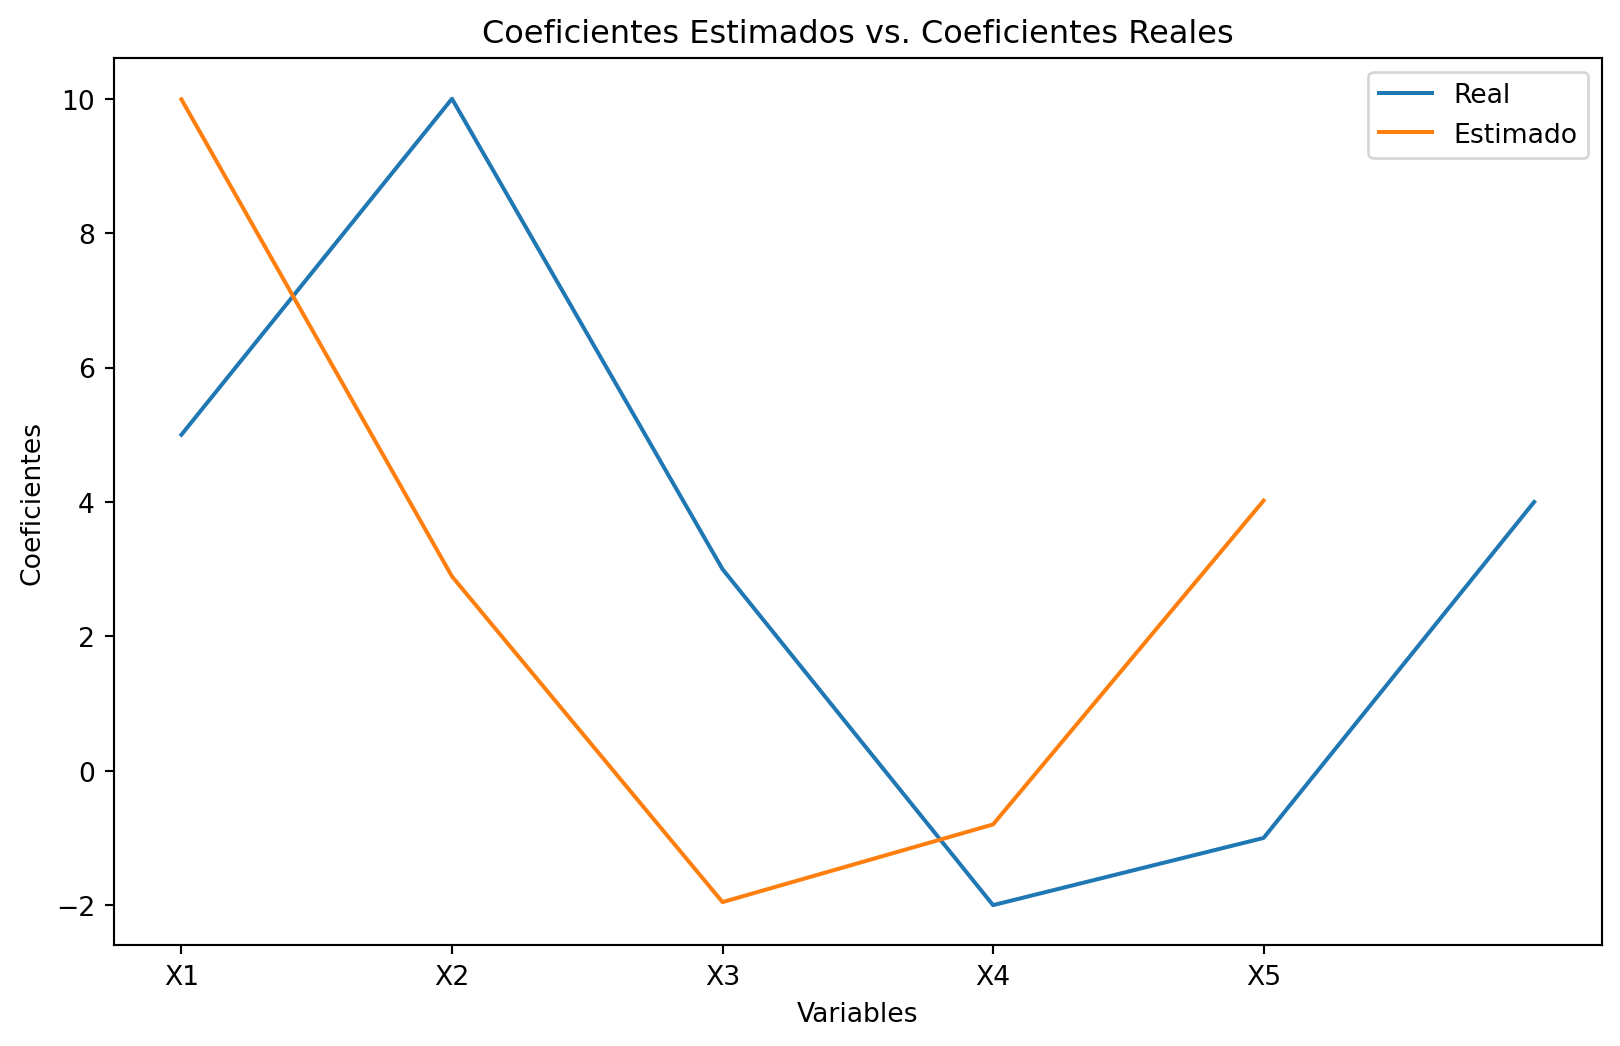

In [13]:
# Graficar parámetros estimados y valores reales
plt.figure(figsize=(10, 6))
plt.plot(betas, label='Real')
plt.plot(model.params[1:], label='Estimado')
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes Estimados vs. Coeficientes Reales')
plt.legend()
plt.show()